# LBFGS Implemetation

epoch =  100 , loss =  0.37325978
epoch =  200 , loss =  0.2516321
epoch =  300 , loss =  0.19545211
epoch =  400 , loss =  0.16104053
epoch =  500 , loss =  0.13296083
epoch =  600 , loss =  0.118154205
epoch =  700 , loss =  0.108991645
epoch =  800 , loss =  0.10344009
epoch =  900 , loss =  0.09922567
epoch =  1000 , loss =  0.09566099
epoch =  1100 , loss =  0.093932584
epoch =  1200 , loss =  0.09339367
epoch =  1300 , loss =  0.09312437
epoch =  1400 , loss =  0.092798226
epoch =  1500 , loss =  0.09219982
epoch =  1600 , loss =  0.09163032
epoch =  1700 , loss =  0.091306604
epoch =  1800 , loss =  0.090997696
epoch =  1900 , loss =  0.09080351
epoch =  2000 , loss =  0.09056796
epoch =  2100 , loss =  0.09027304
epoch =  2200 , loss =  0.089121655
epoch =  2300 , loss =  0.083923794
epoch =  2400 , loss =  0.08299596
epoch =  2500 , loss =  0.08155986
epoch =  2600 , loss =  0.07247005
epoch =  2700 , loss =  0.070198104
epoch =  2800 , loss =  0.061311174
epoch =  2900 , loss

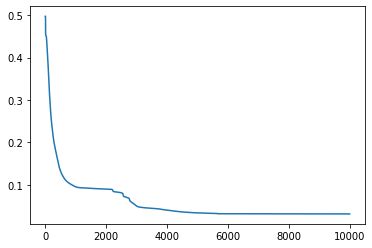

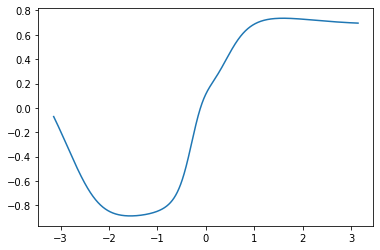

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt

# Hyper-parameters
learning_rate = 1e-4
n_iters = 10000

# Iterations v/s Loss Storage
iters = [0]
loss_store = []

# Setup training and test dataset
x = torch.linspace(-math.pi,math.pi,2000)
y = torch.sin(x)
x = x.unsqueeze(-1)
y = y.unsqueeze(-1)

# Setup NN
NN1 = nn.Sequential( nn.Linear(1, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 1), nn.Tanh() )

for layer in NN1.modules():
    if isinstance(layer, nn.Linear):
         layer.weight.data.normal_(mean=0, std=0.15)

# Setup Loss function and LBFGS Optimiser
loss_func = nn.MSELoss()
optimiser = torch.optim.LBFGS(NN1.parameters(),lr = learning_rate, 
                              max_iter = n_iters)

# For training NN
def closure(): 
    
    u = NN1(x)
    optimiser.zero_grad()
    loss = loss_func(u,y)
    loss.backward()   
    
    iters.append(iters[-1]+1)
    loss_store.append(loss.detach().numpy())
    if iters[-1]%100 == 0:
        print('epoch = ',iters[-1],', loss = ',loss.detach().numpy())
        
    return loss

optimiser.step(closure)

# Predicting test data
y_pred = NN1(x)
y_pred = y_pred.detach().numpy()

# Plot
plt.figure(0)
plt.plot(iters[1:len(iters)], loss_store)
plt.ylabel('Loss')
plt.xlabel('Iterations')

plt.figure(1)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(["predicted","actual"])
plt.ylabel('Y')
plt.xlabel('X')

# Extract Weights and Biases
w = list(NN1.parameters())

# Adam Optimiser

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt

learning_rate = 1e-4
n_iters = 10000

x = torch.linspace(-math.pi,math.pi,2000)
x = x.unsqueeze(-1)
y = torch.sin(x)

NN1 = nn.Sequential( nn.Linear(1, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 1), nn.Tanh() )

for layer in NN1.modules():
    if isinstance(layer, nn.Linear):
         layer.weight.data.normal_(mean=0, std=0.15)

loss_func = nn.MSELoss()
optimiser = torch.optim.Adam(NN1.parameters(), lr=learning_rate)

for i in range(n_iters):
    pred_y = NN1(x)
    loss = loss_func(pred_y, y)

    if i%100 == 0:
        print('epoch = ',i,', loss = ',loss.detach().numpy())
        
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
y_pred = NN1(x)
y_pred = y_pred.detach().numpy()

plt.figure(0)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(["predicted","actual"])
plt.ylabel('Y')
plt.xlabel('X')

# Extract Weights and Biases
w = list(NN1.parameters())

epoch =  0 , loss =  0.5240102
epoch =  100 , loss =  0.43560922
epoch =  200 , loss =  0.191064
epoch =  300 , loss =  0.0978142
epoch =  400 , loss =  0.09052458
epoch =  500 , loss =  0.08846878
epoch =  600 , loss =  0.086368725
epoch =  700 , loss =  0.083709955
epoch =  800 , loss =  0.0802179
epoch =  900 , loss =  0.07567375
epoch =  1000 , loss =  0.07087453
epoch =  1100 , loss =  0.067549475
epoch =  1200 , loss =  0.0656986
epoch =  1300 , loss =  0.064471774
epoch =  1400 , loss =  0.06334198
epoch =  1500 , loss =  0.062019594
epoch =  1600 , loss =  0.06023549
epoch =  1700 , loss =  0.057572752
epoch =  1800 , loss =  0.053295285
epoch =  1900 , loss =  0.046302922
epoch =  2000 , loss =  0.035993632
epoch =  2100 , loss =  0.024223376
epoch =  2200 , loss =  0.01409935
epoch =  2300 , loss =  0.0076402607
epoch =  2400 , loss =  0.0046030967
epoch =  2500 , loss =  0.0032483286
epoch =  2600 , loss =  0.0024343336
epoch =  2700 , loss =  0.0017957435
epoch =  2800 , lo

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2000x3 and 1x20)

# PINN 

epoch =  100 , loss =  3.9315486
epoch =  200 , loss =  3.8743324
epoch =  300 , loss =  3.8222756
epoch =  400 , loss =  3.7752042
epoch =  500 , loss =  2.281608
epoch =  600 , loss =  1.233036
epoch =  700 , loss =  0.8676597
epoch =  800 , loss =  0.69911134
epoch =  900 , loss =  0.61959153
epoch =  1000 , loss =  0.5883063
epoch =  1100 , loss =  0.5712241
epoch =  1200 , loss =  0.47627053
epoch =  1300 , loss =  0.38815087
epoch =  1400 , loss =  0.3307861
epoch =  1500 , loss =  0.2375782
epoch =  1600 , loss =  0.16676286
epoch =  1700 , loss =  0.10373231
epoch =  1800 , loss =  0.08770212
epoch =  1900 , loss =  0.080290265
epoch =  2000 , loss =  0.075675935
epoch =  2100 , loss =  0.0643873
epoch =  2200 , loss =  0.05911606
epoch =  2300 , loss =  0.055011198
epoch =  2400 , loss =  0.05294717
epoch =  2500 , loss =  0.051509947
epoch =  2600 , loss =  0.049683444
epoch =  2700 , loss =  0.04577788
epoch =  2800 , loss =  0.0409005
epoch =  2900 , loss =  0.031583063
epo

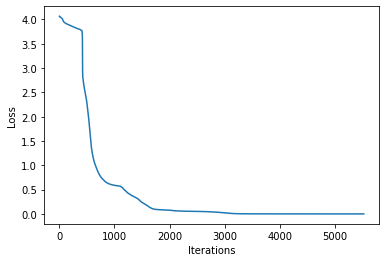

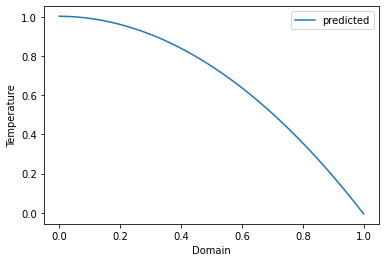

In [203]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt

# Iterations v/s Loss Storage
iters = [0]
loss_store = []

# Boundary Conditions 
left_temp = 1
right_temp = 0
x_l = 0
x_r = 1 
s = 2

# Setup training and test dataset
N_train = 5000
N_test = 2000
N_bc = 300

x_train1 = torch.rand(N_train-2*N_bc)
x_bc1 = torch.ones(N_bc)*x_r
x_bc2 = torch.ones(N_bc)*x_l
x_train2 = torch.cat((x_train1,x_bc1,x_bc2),0)
x_test = torch.linspace(x_l,x_r,N_test)
null = torch.zeros(N_train)

x_train2 = x_train2.unsqueeze(-1)
x_train = x_train2.clone().detach().requires_grad_(True)
x_test = x_test.unsqueeze(-1)
null = null.unsqueeze(-1)

# Setup NN
n_input = 1
n_output = 1
NN1 = nn.Sequential( nn.Linear(n_input, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, 20), nn.Tanh(),
                     nn.Linear(20, n_output) )

for layer in NN1.modules():
    if isinstance(layer, nn.Linear):
         layer.weight.data.normal_(mean=0, std=0.15)

# Hyper-parameters
learning_rate = 5e-4
n_iters = 14000
            
# Setup Loss function and LBFGS Optimiser
mse = nn.MSELoss()
optimiser = torch.optim.LBFGS(NN1.parameters(),
                              lr = learning_rate, 
                              max_iter = n_iters)

# For training NN
def closure(): 
    
    T = NN1(x_train)
    dTdx = torch.autograd.grad(T, x_train, grad_outputs=torch.ones_like(T), create_graph=True)[0]
    dT2dx2 = torch.autograd.grad(dTdx, x_train, grad_outputs=torch.ones_like(dTdx), create_graph=True)[0]

    optimiser.zero_grad()
    eq = mse(dT2dx2 + s, null)
    bc1 = mse( torch.mul(torch.where(x_train == x_r,1,0),(T - right_temp)), null )
    bc2 = mse( torch.mul(torch.where(x_train == x_l,1,0),(T - left_temp)), null )
    loss = eq + bc1 + bc2
    loss.backward()   
    
    iters.append(iters[-1]+1)
    loss_store.append(loss.detach().numpy())
    if iters[-1]%100 == 0:
        print('epoch = ',iters[-1],', loss = ',loss.detach().numpy())
        
    return loss

optimiser.step(closure)

# Predicting test data
y_pred = NN1(x_test)
y_pred = y_pred.detach().numpy()

# Plot
plt.figure(0)
plt.plot(iters[1:len(iters)], loss_store)
plt.ylabel('Loss')
plt.xlabel('Iterations')

plt.figure(1)
plt.plot(x_test, y_pred)
plt.plot(x_test, -torch.mul(x_test,x_test)+1)
plt.legend(["predicted", "actual"])
plt.ylabel('Temperature')
plt.xlabel('Domain')

# Extract Weights and Biases
w = list(NN1.parameters())